수치 미분이 너무 느리기 때문에 오차 역전파를 사용해서 기울기를 구해 가중치를 갱신해줘야 함  
오차 역전파를 이해하기 쉽도록 그림으로 코딩 전에 이론을 이해하는 과정이 계산 그래프  
1. 계산 그래프를 통해서 덧셈 그래프와 곱셈 그래프를 이해  
2. Relu 함수 클래스 생성  
3. sigmoid 함수 계산 그래프, 클래스 생성(순전파, 역전파)
4. Affine계층( 행렬의 내적 )

In [1]:
# 필요한 패키지 다운로드
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
tf.random.set_seed(777)

#2. mnist 데이터를 불러옴
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')

#3. 정규화를 진행
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size = 0.3, 
                                                  random_state = 777)

num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

x_train = (x_train.reshape((num_x_train, 28 * 28))) / 255
x_val = (x_val.reshape((num_x_val, 28 * 28))) / 255
x_test = (x_test.reshape((num_x_test, 28 * 28))) / 255

#4. 정답을 onehot_encoding 한다.
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

#5. 신경망 모델을 구성한다.
model = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (784, )))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

#6. 신경망 모델을 설정한다.
model.compile(optimizer='RMSProp', 
              loss = 'categorical_crossentropy', 
              metrics=['acc'])

#7. 신경망 모델을 훈련시킨다.
history = model.fit(x_train, y_train, 
                    epochs = 30, 
                    batch_size = 100, 
                    validation_data = (x_val, y_val))

Epoch 1/30
420/420 [==============================] - 4s 7ms/step - loss: 0.6406 - acc: 0.8182 - val_loss: 0.2164 - val_acc: 0.9399
Epoch 2/30
420/420 [==============================] - 2s 4ms/step - loss: 0.1958 - acc: 0.9423 - val_loss: 0.1492 - val_acc: 0.9567
Epoch 3/30
420/420 [==============================] - 2s 5ms/step - loss: 0.1321 - acc: 0.9613 - val_loss: 0.1281 - val_acc: 0.9624
Epoch 4/30
420/420 [==============================] - 2s 4ms/step - loss: 0.0967 - acc: 0.9707 - val_loss: 0.1081 - val_acc: 0.9674
Epoch 5/30
420/420 [==============================] - 2s 4ms/step - loss: 0.0796 - acc: 0.9769 - val_loss: 0.1071 - val_acc: 0.9676
Epoch 6/30
420/420 [==============================] - 2s 4ms/step - loss: 0.0666 - acc: 0.9796 - val_loss: 0.0988 - val_acc: 0.9703
Epoch 7/30
420/420 [==============================] - 1s 4ms/step - loss: 0.0499 - acc: 0.9855 - val_loss: 0.0957 - val_acc: 0.9713
Epoch 8/30
420/420 [==============================] - 2s 4ms/step - loss: 0.

In [2]:
#8. 모델을 평가한다. 
model.evaluate(x_test, y_test)

#9. 테스트 데이터의 정확도를 확인한다.
results = model.predict(x_test)

# 정확도 확인 
import  numpy  as  np

y_hat=np.argmax(results, axis=1)
y_label=np.argmax(y_test, axis=1)
sum(y_hat==y_label)/len(y_label)

313/313 [==============================] - 1s 2ms/step - loss: 0.1748 - acc: 0.9733


0.9733

문제 109. 지금 만든 3층 신경망에 활성화 함수를 relu로 했을 때의 테스트 데이터의 정확도는 0.976이었다. 그렇다면 sigmoid 함수로 했을 때는 정확도가 어떻게 되는지 확인하시오

In [3]:
# 필요한 패키지 다운로드
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
tf.random.set_seed(777)

#2. mnist 데이터를 불러옴
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')

#3. 정규화를 진행
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size = 0.3, 
                                                  random_state = 777)

num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

x_train = (x_train.reshape((num_x_train, 28 * 28))) / 255
x_val = (x_val.reshape((num_x_val, 28 * 28))) / 255
x_test = (x_test.reshape((num_x_test, 28 * 28))) / 255

#4. 정답을 onehot_encoding 한다.
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

#5. 신경망 모델을 구성한다.
model = Sequential()
model.add(Dense(100, activation = 'sigmoid', input_shape = (784, )))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(10, activation = 'softmax'))

#6. 신경망 모델을 설정한다.
model.compile(optimizer='RMSProp', 
              loss = 'categorical_crossentropy', 
              metrics=['acc'])

#7. 신경망 모델을 훈련시킨다.
history = model.fit(x_train, y_train, 
                    epochs = 30, 
                    batch_size = 100, 
                    validation_data = (x_val, y_val))

Epoch 1/30
420/420 [==============================] - 2s 2ms/step - loss: 1.4243 - acc: 0.6478 - val_loss: 0.3817 - val_acc: 0.9042
Epoch 2/30
420/420 [==============================] - 1s 3ms/step - loss: 0.3407 - acc: 0.9080 - val_loss: 0.2602 - val_acc: 0.9254
Epoch 3/30
420/420 [==============================] - 1s 3ms/step - loss: 0.2459 - acc: 0.9283 - val_loss: 0.2189 - val_acc: 0.9358
Epoch 4/30
420/420 [==============================] - 2s 4ms/step - loss: 0.1968 - acc: 0.9420 - val_loss: 0.1862 - val_acc: 0.9461
Epoch 5/30
420/420 [==============================] - 2s 5ms/step - loss: 0.1685 - acc: 0.9503 - val_loss: 0.1700 - val_acc: 0.9486
Epoch 6/30
420/420 [==============================] - 2s 4ms/step - loss: 0.1493 - acc: 0.9571 - val_loss: 0.1524 - val_acc: 0.9543
Epoch 7/30
420/420 [==============================] - 2s 4ms/step - loss: 0.1250 - acc: 0.9633 - val_loss: 0.1406 - val_acc: 0.9569
Epoch 8/30
420/420 [==============================] - 2s 4ms/step - loss: 0.

In [4]:
#8. 모델을 평가한다. 
model.evaluate(x_test, y_test)

#9. 테스트 데이터의 정확도를 확인한다.
results = model.predict(x_test)

# 정확도 확인 
import  numpy  as  np

y_hat=np.argmax(results, axis=1)
y_label=np.argmax(y_test, axis=1)
sum(y_hat==y_label)/len(y_label)

313/313 [==============================] - 1s 3ms/step - loss: 0.0884 - acc: 0.9762


0.9762

문제 110. 지금 위의 결과를 시각화해서 성능을 확인하시오

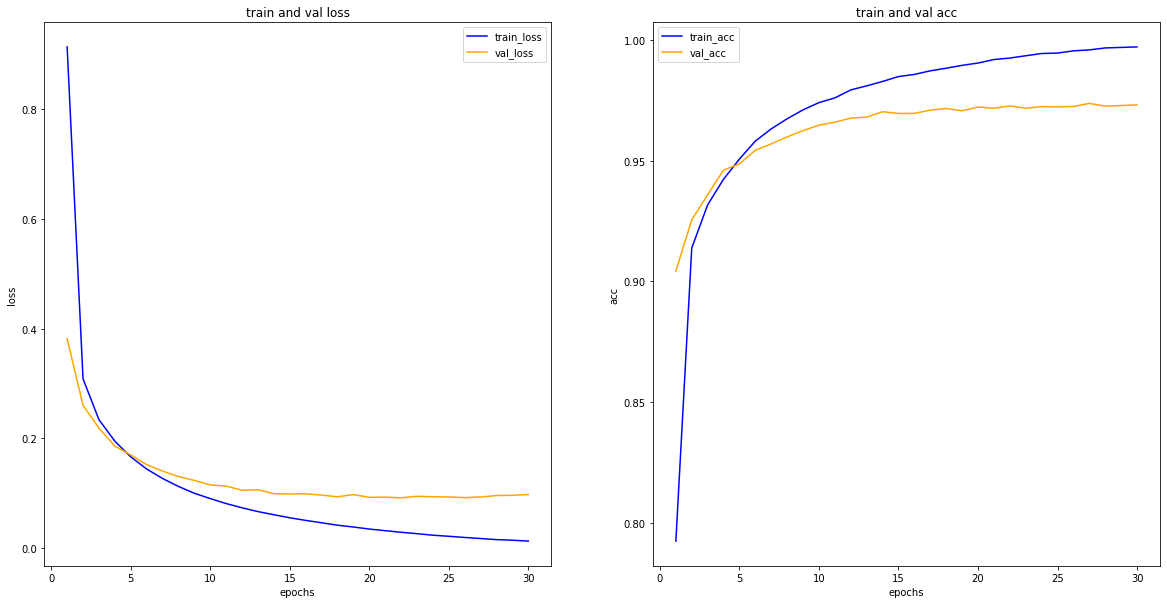

In [5]:
# 시각화
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig =plt.figure(figsize = (20, 10))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

train and val acc 그래프에서 검증 그래프와 훈련 그래프의 간격이 커지면 커질 수록 overfitting이 커진다.  
시각화를 하여 오버피팅이 일어나고 있는 것을 확인함  

문제 111. 지금 신경망은 3층 신경망인데 4층으로 신경망을 구성해보시오

In [6]:
# 필요한 패키지 다운로드
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
tf.random.set_seed(777)

#2. mnist 데이터를 불러옴
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')

#3. 정규화를 진행
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size = 0.3, 
                                                  random_state = 777)

num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

x_train = (x_train.reshape((num_x_train, 28 * 28))) / 255
x_val = (x_val.reshape((num_x_val, 28 * 28))) / 255
x_test = (x_test.reshape((num_x_test, 28 * 28))) / 255

#4. 정답을 onehot_encoding 한다.
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

#5. 신경망 모델을 구성한다.
model = Sequential()
model.add(Dense(100, activation = 'sigmoid', input_shape = (784, )))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(10, activation = 'softmax'))

#6. 신경망 모델을 설정한다.
model.compile(optimizer='RMSProp', 
              loss = 'categorical_crossentropy', 
              metrics=['acc'])

#7. 신경망 모델을 훈련시킨다.
history = model.fit(x_train, y_train, 
                    epochs = 30, 
                    batch_size = 100, 
                    validation_data = (x_val, y_val))

Epoch 1/30
420/420 [==============================] - 3s 4ms/step - loss: 1.7602 - acc: 0.4866 - val_loss: 0.5793 - val_acc: 0.8649
Epoch 2/30
420/420 [==============================] - 2s 5ms/step - loss: 0.4925 - acc: 0.8788 - val_loss: 0.3241 - val_acc: 0.9136
Epoch 3/30
420/420 [==============================] - 2s 5ms/step - loss: 0.2989 - acc: 0.9194 - val_loss: 0.2495 - val_acc: 0.9297
Epoch 4/30
420/420 [==============================] - 2s 5ms/step - loss: 0.2213 - acc: 0.9387 - val_loss: 0.2025 - val_acc: 0.9441
Epoch 5/30
420/420 [==============================] - 2s 5ms/step - loss: 0.1798 - acc: 0.9496 - val_loss: 0.1770 - val_acc: 0.9496
Epoch 6/30
420/420 [==============================] - 2s 5ms/step - loss: 0.1553 - acc: 0.9569 - val_loss: 0.1584 - val_acc: 0.9548
Epoch 7/30
420/420 [==============================] - 1s 3ms/step - loss: 0.1247 - acc: 0.9657 - val_loss: 0.1459 - val_acc: 0.9584
Epoch 8/30
420/420 [==============================] - 2s 5ms/step - loss: 0.

In [7]:
#8. 모델을 평가한다. 
model.evaluate(x_test, y_test)

#9. 테스트 데이터의 정확도를 확인한다.
results = model.predict(x_test)

# 정확도 확인 
import  numpy  as  np

y_hat=np.argmax(results, axis=1)
y_label=np.argmax(y_test, axis=1)
sum(y_hat==y_label)/len(y_label)

313/313 [==============================] - 1s 2ms/step - loss: 0.1222 - acc: 0.9719


0.9719

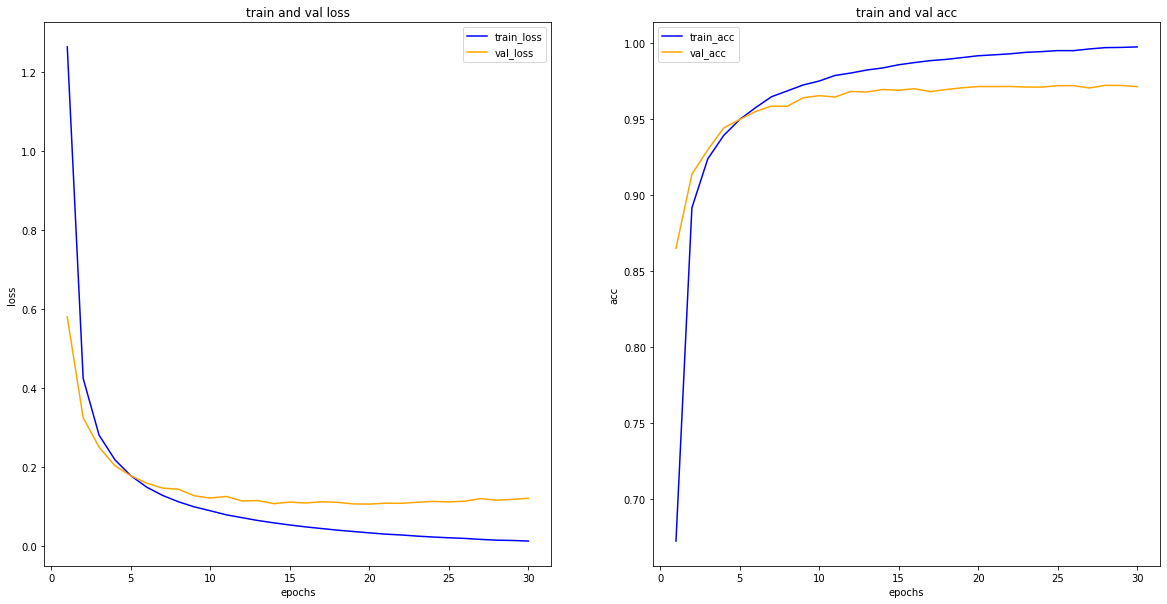

In [8]:
# 시각화
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig =plt.figure(figsize = (20, 10))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

4층으로 변경하였더니 3층일때 0.976에서 0.971 로 정확도가 더 줄어들었다.

train acc, test acc | 0.13311666666666666, 0.1328
train acc, test acc | 0.9009333333333334, 0.9044
train acc, test acc | 0.9234666666666667, 0.9259
train acc, test acc | 0.9369, 0.9386
train acc, test acc | 0.9455833333333333, 0.9436
train acc, test acc | 0.9499833333333333, 0.9481
train acc, test acc | 0.9576666666666667, 0.9552
train acc, test acc | 0.9610166666666666, 0.9575
train acc, test acc | 0.9637666666666667, 0.9599
train acc, test acc | 0.9668333333333333, 0.9627
train acc, test acc | 0.96825, 0.9625
train acc, test acc | 0.97095, 0.9644
train acc, test acc | 0.9720833333333333, 0.9636
train acc, test acc | 0.9741833333333333, 0.966
train acc, test acc | 0.9757333333333333, 0.9665
train acc, test acc | 0.9767666666666667, 0.9681
train acc, test acc | 0.9773666666666667, 0.969


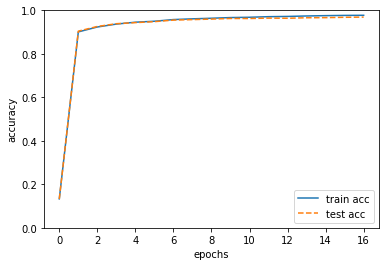

In [11]:
# coding: utf-8
import sys, os

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1: t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        # forward
        self.loss(x, t)
        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()

        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        return grads

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터

iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0] # 60000 개
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num): # 10000
    # 미니배치 획득  # 랜덤으로 100개씩 뽑아서 10000번을 수행하니까 백만번
    batch_mask = np.random.choice(train_size, batch_size) # 100개 씩 뽑아서 10000번 백만번
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss) # cost 가 점점 줄어드는것을 보려고

    # 1에폭당 정확도 계산 # 여기는 훈련이 아니라 1에폭 되었을때 정확도만 체크
    if i % iter_per_epoch == 0: # 600 번마다 정확도 쌓는다.

        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc) # 10000/600 개  16개 # 정확도가 점점 올라감
        test_acc_list.append(test_acc)  # 10000/600 개 16개 # 정확도가 점점 올라감
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

■ 수치미분과 오차 역전파의 차이가 무엇인가?  
- "수치미분은 미분식을 사용하고 오차역전파는 도함수식을 사용한다"  


- 수치미분은 오차함수를 바로 가중치로 편미분해서 기울기를 구했지만 이렇게 계산하면 사람도 어렵고 컴퓨터도 어렵다. (시간이 많이 걸림)  


- 그래서 합성함수 미분처럼 연쇄법칙에 의해서 신경망 안에 들어가는 각각의 함수들의 도함수를 구해서 도함수를 backward에 넣고   
기울기가 역전파되어서 흘러가게 하면 그 기울기로 가중치를 갱신하는 것이 수치미분으로 했을 때 보다 훨씬 빠르다.

<br>

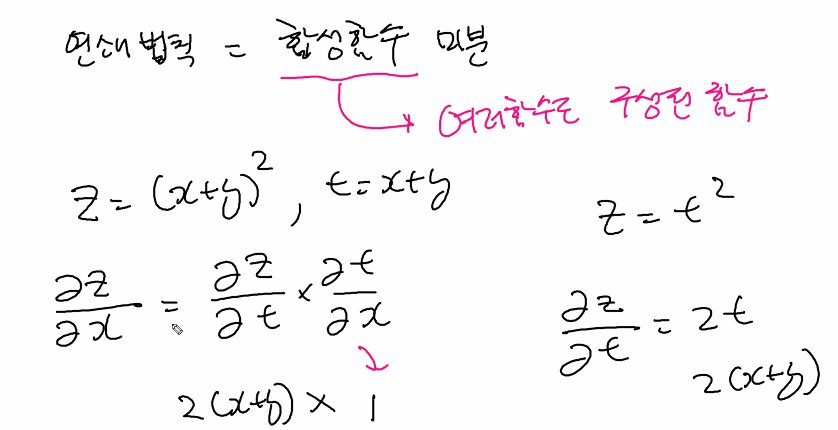
